[1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 

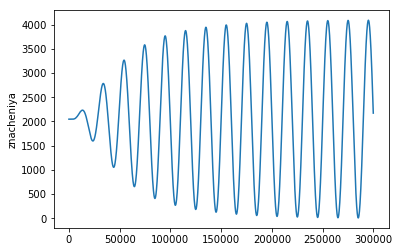

In [52]:
import matplotlib.pyplot as plot
import numpy as np
import sqlite3

np.set_printoptions(suppress=True)
k=0
z=0
w=0
import random
#input(i)
#input(j)
data = np.genfromtxt("norm.dat", delimiter=",", usecols=(0,1,2,3,4))
#print(data[i,1])
dataKZ = np.genfromtxt("KZ.dat", delimiter=",",usecols=(0,1,2,3,4))
conn = sqlite3.connect("D.db")
measur = (
    (1, 'I1a', 1),
    (2, 'I1b', 2),
    (3, 'I1b', 3),
    (4, 'I2a', 4),
    (5, 'I2b', 5),
    (6, 'I2c', 6),
)
rezh = (
    (1, 'Norm'),
    (2, 'KZ'),
)
cursor=conn.cursor()
cursor.execute("DROP TABLE IF EXISTS DataPoints")
cursor.execute('''CREATE TABLE IF NOT EXISTS DataPoints (id INTEGER, time INTEGER, value STRING, measurment_id INTEGER, rezhim_id INTEGER)''')
conn.commit()
cursor.execute("DROP TABLE IF EXISTS measurments")
cursor.execute("CREATE TABLE measurments(Id, Name, sc_id)")
cursor.executemany("INSERT INTO measurments VALUES(?, ?, ?)", measur)
conn.commit()
cursor.execute("DROP TABLE IF EXISTS rezhim")
cursor.execute("CREATE TABLE rezhim(Id, Name)")
cursor.executemany("INSERT INTO rezhim VALUES(?, ?)", rezh)
conn.commit()
cursor.execute("DROP TABLE IF EXISTS scale")
cursor.execute("CREATE TABLE scale (Id, Name)")

conn.commit()
for i in range (6000):
    if  i%3==0:
        k=k+1
        z=data[i,1]
        w=data[i,2]
        cursor.execute("INSERT or REPLACE INTO DataPoints (id, time, value, measurment_id, rezhim_id) VALUES (?, ?, ?, ?, ?)", (k,z,w,1,1))
    else:
        k=k+1
        z=data[i,1]
        w=data[i,2]
        cursor.execute("INSERT or REPLACE INTO DataPoints (id, time, value, measurment_id, rezhim_id) VALUES (?, ?, ?, ?, ?)", (k,z,w,2,1))
        #print('c')
conn.commit()
m=0        
meas=[]
for row in cursor.execute('SELECT measurment_id FROM Datapoints'):
    mes=(str(row))
    meas.append(int((mes[1:-2])))
#print(meas)
            #print('m=1') 
k=0 
val=[]
for row in cursor.execute('SELECT value FROM Datapoints'):
    k=str(row)
    #print (k[1:-2])
#    print (k[1:-2])
    val.append(int(k[1:-2]))
#print(val)
tim=[]
for row in cursor.execute('SELECT time FROM Datapoints'):
    k=str(row)
    #print (k[1:-2])
    tim.append(int(k[1:-2]))
print(len(tim))
data_y=[]
data_x=[]
data_m=[]
for x in range (len(tim)):
    data_m.append(meas[x])
    if meas[x]==1:
        data_y.append(val[x])
        data_x.append(tim[x])
        

plot.plot(data_x, data_y)
plot.ylabel('znacheniya')
plot.show()
conn.close()
